In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.patches as mpatches
import pandas as pd
import sys
import os
sys.path.append('../scripts_python')  # Add the path to the desired folder
from pca import logistic_pca
import umap
import matplotlib.patches as mpatches

from sklearn.manifold import TSNE


/home/ubuntu/miniconda3/envs/cdd/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/miniconda3/envs/cdd/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/miniconda3/envs/cdd/lib/python3.10/site-packages/umap/distanc

/home/ubuntu/miniconda3/envs/cdd/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [2]:
# n_protein = 1000
# n_rna = 1000

# enamine_protein_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_protein_ECFP6_MaxMin_v2.pkl').head(n_protein)
# chemdiv_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/chemdiv_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)
# enamine_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)
# life_chemicals_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/life_chemicals_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)
# robin_df_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/robin_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)

# combined_df = pd.concat([enamine_protein_div6, chemdiv_div6, enamine_div6, life_chemicals_div6, robin_df_div6], ignore_index=True)
# # shuffle the data
# combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# n_protein = 2500
# n_rna = 250

# enamine_protein_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_protein_ECFP6_MaxMin_v2.pkl').head(n_protein)
# chemdiv_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/chemdiv_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)
# enamine_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)
# life_chemicals_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/life_chemicals_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)
# robin_df_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/robin_rna_ECFP6_MaxMin_v2.pkl').head(n_rna)

# combined_df2 = pd.concat([enamine_protein_div62, chemdiv_div62, enamine_div62, life_chemicals_div62, robin_df_div62], ignore_index=True)
# # shuffle the data
# combined_df2 = combined_df2.sample(frac=1).reset_index(drop=True)

In [3]:
n_protein = 800
n_rna = 800

# Read and shuffle enamine_protein_div6
enamine_protein_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_protein_ECFP6_MaxMin_v3.pkl')
enamine_protein_div6 = enamine_protein_div6.sample(n=n_protein, random_state=1)

# Read and shuffle chemdiv_div6
chemdiv_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/chemdiv_rna_ECFP6_MaxMin_v3.pkl')
chemdiv_div6 = chemdiv_div6.sample(n=n_rna, random_state=2)

# Read and shuffle enamine_div6
enamine_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_rna_ECFP6_MaxMin_v3.pkl')
enamine_div6 = enamine_div6.sample(n=n_rna, random_state=3)

# Read and shuffle life_chemicals_div6
life_chemicals_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/life_chemicals_rna_ECFP6_MaxMin_v3.pkl')
life_chemicals_div6 = life_chemicals_div6.sample(n=n_rna, random_state=4)

# Read and shuffle robin_df_div6
robin_df_div6 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/robin_rna_ECFP6_MaxMin_v3.pkl')
robin_df_div6 = robin_df_div6.sample(n=n_rna, random_state=5)

# Concatenate the shuffled DataFrames
combined_df = pd.concat([enamine_protein_div6, chemdiv_div6, enamine_div6, life_chemicals_div6, robin_df_div6], ignore_index=True)
# combined_df = combined_df.sample(frac=1, random_state=6).reset_index(drop=True)

n_protein = 2000
n_rna = 500

# Read and shuffle enamine_protein_div62
enamine_protein_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_protein_ECFP6_MaxMin_v3.pkl')
enamine_protein_div62 = enamine_protein_div62.sample(n=n_protein, random_state=1)

# Read and shuffle chemdiv_div62
chemdiv_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/chemdiv_rna_ECFP6_MaxMin_v3.pkl')
chemdiv_div62 = chemdiv_div62.sample(n=n_rna, random_state=2)

# Read and shuffle enamine_div62
enamine_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/enamine_rna_ECFP6_MaxMin_v3.pkl')
enamine_div62 = enamine_div62.sample(n=n_rna, random_state=3)

# Read and shuffle life_chemicals_div62
life_chemicals_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/life_chemicals_rna_ECFP6_MaxMin_v3.pkl')
life_chemicals_div62 = life_chemicals_div62.sample(n=n_rna, random_state=4)

# Read and shuffle robin_df_div62
robin_df_div62 = pd.read_pickle('../data/diversity_picking/ECFP6_v2/robin_rna_ECFP6_MaxMin_v3.pkl')
robin_df_div62 = robin_df_div62.sample(n=n_rna, random_state=5)

# Concatenate the shuffled DataFrames
combined_df2 = pd.concat([enamine_protein_div62, chemdiv_div62, enamine_div62, life_chemicals_div62, robin_df_div62], ignore_index=True)
# combined_df2 = combined_df2.sample(frac=1, random_state=6).reset_index(drop=True)


In [4]:
rna_list = [chemdiv_div6, enamine_div6, life_chemicals_div6, robin_df_div6]

rna_list2 = [chemdiv_div62, enamine_div62, life_chemicals_div62, robin_df_div62]


In [5]:
combined_df_rna = pd.concat(rna_list, ignore_index=True)

combined_df_rna2 = pd.concat(rna_list2, ignore_index=True)

In [6]:
# create directory for saving similarity matrices
if not os.path.exists('../output/v2'):
    os.makedirs('../output/v2')

In [7]:
# extract all the smiles to text file one on each line
with open('../output/v2/combined_rna_smiles_v2.txt', 'w') as f:
    for item in combined_df_rna['smiles']:
        f.write("%s\n" % item)
        

In [8]:
# unique 'source' column show
combined_df['source'].unique()
combined_df.rename(columns={'source': 'Source'}, inplace=True)
# if 'Source' columns is enamine_protein set it to 'Protein' else 'RNA'
combined_df['Binding'] = np.where(combined_df['Source'] == 'enamine_protein', 'Protein', 'RNA')

combined_df['Source'] = combined_df['Source'].replace({'enamine_protein': 'Enamine Protein', 
                                                        'enamine': 'Enamine RNA', 
                                                        'life_chemicals': 'Life Chemicals RNA', 
                                                        'chemdiv': 'ChemDiv RNA', 
                                                        'robin': 'Robin RNA'})

In [9]:
# unique 'source' column show
combined_df2['source'].unique()
combined_df2.rename(columns={'source': 'Source'}, inplace=True)
# if 'Source' columns is enamine_protein set it to 'Protein' else 'RNA'
combined_df2['Binding'] = np.where(combined_df2['Source'] == 'enamine_protein', 'Protein', 'RNA')

combined_df2['Source'] = combined_df2['Source'].replace({'enamine_protein': 'Enamine Protein', 
                                                        'enamine': 'Enamine RNA', 
                                                        'life_chemicals': 'Life Chemicals RNA', 
                                                        'chemdiv': 'ChemDiv RNA', 
                                                        'robin': 'Robin RNA'})

Number of samples: 4000
Number of features: 2048
Number of samples: 4000
Number of features: 2048


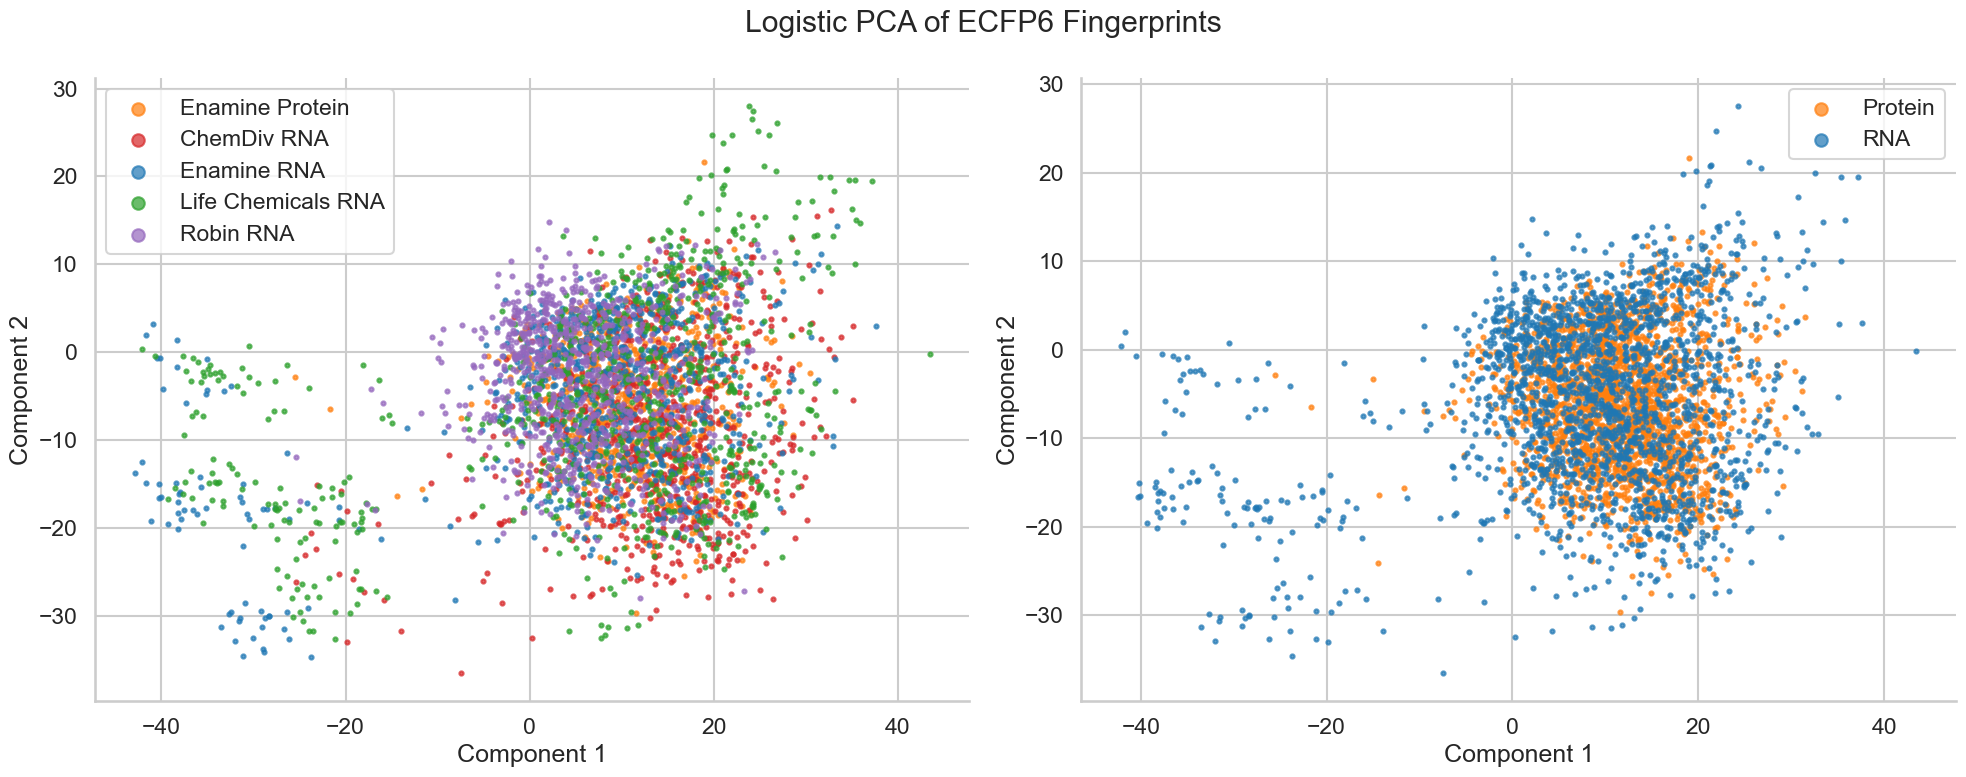

In [10]:


ix_color = np.array(combined_df['Source'].map({'Enamine RNA': 0, 'Enamine Protein': 1, 'Life Chemicals RNA': 2, 'ChemDiv RNA': 3, 'Robin RNA': 4}), dtype=np.int8)
ix_color_2 = np.array(combined_df2['Binding'].map({'RNA': 0, 'Protein': 1}), dtype=np.int8)

def scatter_plot(Z, ix_color=None, colors=None, source=None, ix_color_2=None, colors_2=None, source_2=None):
    sns.set(style="whitegrid", context='talk')
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # Two subplots in one row
    
    # Used to track which labels have been added to the legend
    added_labels = set()

    # First subplot
    if ix_color is not None and colors is not None and source is not None:
        for i in range(len(ix_color)):
            if source[i] not in added_labels:             
                axs[0].scatter(Z[i, 0], Z[i, 1], c=[colors[ix_color[i]]], label=source[i], s=9, alpha=0.7)
                added_labels.add(source[i])
            else:
                axs[0].scatter(Z[i, 0], Z[i, 1], c=[colors[ix_color[i]]], s=9, alpha=0.7)

        axs[0].set_xlabel('Component 1')
        axs[0].set_ylabel('Component 2')

    added_labels.clear()

    # Second subplot
    if ix_color_2 is not None and colors_2 is not None and source_2 is not None:
        for i in range(len(ix_color_2)):
            if source_2[i] not in added_labels:
                axs[1].scatter(Z2[i, 0], Z2[i, 1], c=[colors_2[ix_color_2[i]]], label=source_2[i], s=9, alpha=0.7)
                added_labels.add(source_2[i])
            else:
                axs[1].scatter(Z2[i, 0], Z2[i, 1], c=[colors_2[ix_color_2[i]]], s=9, alpha=0.7)

        axs[1].set_xlabel('Component 1')
        axs[1].set_ylabel('Component 2')

    axs[0].legend(scatterpoints=1, markerscale=3)
    axs[1].legend(scatterpoints=1, markerscale=3)

    sns.despine()
    plt.suptitle('Logistic PCA of ECFP6 Fingerprints')
    plt.tight_layout()
    plt.savefig('../output/v2/dual_plot.png', dpi=300)
    plt.show()

X = [list(bit_vector) for bit_vector in combined_df['ECFP6'].tolist()]
X2 = [list(bit_vector) for bit_vector in combined_df2['ECFP6'].tolist()]

# Get the dimensions of X
num_samples = len(X)  # Number of samples
num_samples2 = len(X2)  # Number of samples
num_features = len(X[0])  # Number of features
num_features2 = len(X2[0])  # Number of features

print("Number of samples:", num_samples)
print("Number of features:", num_features)
print("Number of samples:", num_samples2)
print("Number of features:", num_features2)

X = np.array(X, dtype=np.float64)
X2 = np.array(X2, dtype=np.float64)

X = X.astype('float64')  # Convert from bool to float
X2 = X2.astype('float64')  # Convert from bool to float

# Cluster with logistic PCA
W = logistic_pca(X, num_components=2)[0]
# W2 = logistic_pca(X2, num_components=2)[0]

# Project
Z = X.dot(W)    
Z2 = X2.dot(W)

# np.random.seed(69)
# shuffle rows of Z
# np.random.shuffle(Z)

# np.random.seed(69)
# np.random.shuffle(Z2)

# Extract original source of the data without repeating = unique
source = combined_df['Source'].tolist()
source_2 = combined_df2['Binding'].tolist()
# Assign colors to each source

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd" ] # 'red', 'blue', 'green', 'orange', 'purple'] # "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"] # 
colors_2 = ["#1f77b4", "#ff7f0e"]
# Visualize
scatter_plot(Z, ix_color, colors, source, ix_color_2, colors_2, source_2)


In [11]:
colors

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

In [12]:
ix_color_2

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [13]:
Z

array([[ 16.02295132, -18.01630829],
       [  7.50847986,  -0.08892524],
       [ 11.85411714,  -0.75306129],
       ...,
       [  6.14490974,  -0.8854995 ],
       [ 16.25682853,   5.63980083],
       [  4.62330659,  -6.03084512]])

In [14]:
# add columns 'x' and 'y' to the dataframe
combined_df['x'] = Z[:, 0]
combined_df['y'] = Z[:, 1]

In [15]:
# filter using columns x and y and constrains will be y < -20 and x < 10 and add them to new dataframe
filtered_df = combined_df[(combined_df['y'] < -20) & (combined_df['x'] < 10)]
filtered_df

# save the dataframe as pickle file
filtered_df.to_pickle('../output/v2/filtered_df_v2.pkl')

In [16]:
# load distance matrixes
distance_matrix_ECFP6 = pd.read_pickle('../output/distance_matrices/v2/distance_matrix_ECFP6.pkl')


In [17]:
# add column 'binding' to the dataframe where the value is 'Protein' if the source is 'enamine_protein' else 'RNA'
distance_matrix_ECFP6['binding'] = np.where(distance_matrix_ECFP6['source'] == 'enamine_protein', 'Protein', 'RNA') 


In [18]:
distance_matrix_ECFP6['source'].unique()

array(['enamine_protein', 'chemdiv', 'enamine', 'life_chemicals', 'robin'],
      dtype=object)

In [19]:


# but these lists should be np arrays

dist_matrix6 = distance_matrix_ECFP6['ECFP6'].tolist()
dist_matrix6 = np.array(dist_matrix6)


<Figure size 640x480 with 0 Axes>

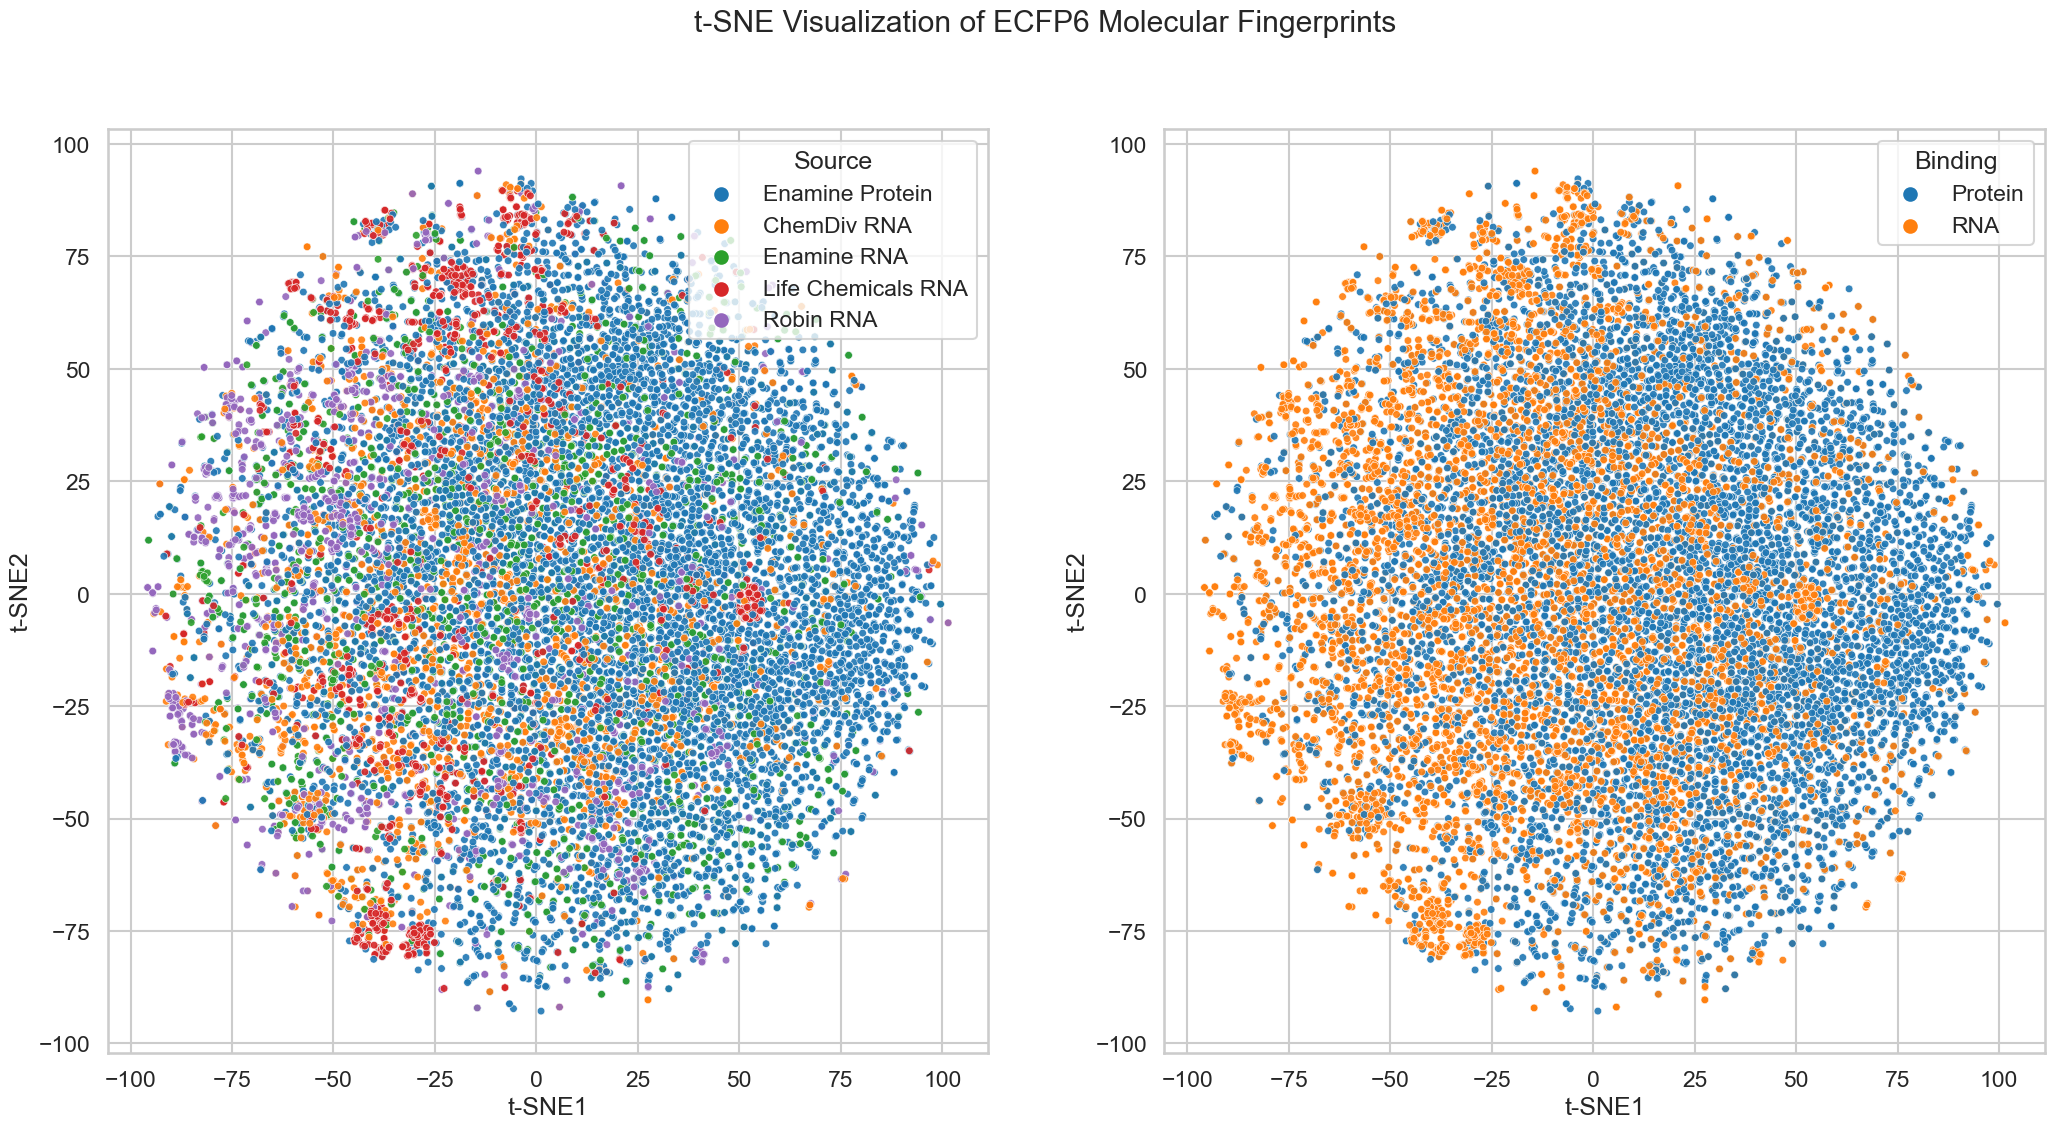

In [20]:
# clear the plot
plt.clf()

pca_data_transformed6 = pd.DataFrame(distance_matrix_ECFP6['source'], columns=['source'])

# we will use t-SNE for dimensionality reduction on distance matrix
n_components = 2
tsne = TSNE(n_components=n_components, n_jobs=16, metric="precomputed", init="random", random_state=42)


# Fit the t-SNE model to the data

pca_data_transformed6 = tsne.fit_transform(dist_matrix6)

pca_data_transformed6 = pd.DataFrame(pca_data_transformed6, columns=['t-SNE1', 't-SNE2'])

pca_data_transformed6['Source'] = distance_matrix_ECFP6['source'].astype(str)
# reaname the values in the column 'Source' enamine_protein to Enamine Protein chemdiv_rna to ChemDiv RNA and so on
pca_data_transformed6['Source'] = pca_data_transformed6['Source'].replace({'enamine_protein': 'Enamine Protein', 
                                                                           'enamine': 'Enamine RNA', 
                                                                           'life_chemicals': 'Life Chemicals RNA', 
                                                                           'chemdiv': 'ChemDiv RNA', 
                                                                           'robin': 'Robin RNA'})

pca_data_transformed6['Binding'] = distance_matrix_ECFP6['binding'].astype(str)


# shuffle the data

pca_data_transformed6 = pca_data_transformed6.sample(frac=1).reset_index(drop=True)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(25, 12))

# Set style
sns.set(style="whitegrid", context='talk')

source_order = ['Enamine Protein', 'ChemDiv RNA', 'Enamine RNA', 'Life Chemicals RNA', 'Robin RNA']
binding_order = ['Protein', 'RNA']

custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
custom_palette2 = sns.color_palette(["#1f77b4", "#ff7f0e"])

# Plot first subplot
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Source', data=pca_data_transformed6, s=30, ax=ax[0], palette=custom_palette, alpha=0.9, hue_order=source_order)

# Plot second subplot
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Binding', data=pca_data_transformed6, s=30, ax=ax[1], palette=custom_palette2, alpha=0.9, hue_order=binding_order)

# create one title for both subplots
plt.suptitle('t-SNE Visualization of ECFP6 Molecular Fingerprints')

# Save the plot as a PNG file
plt.savefig("../output/v2/tsne_plot_binding_source.png", format="png", dpi=300)


<Figure size 640x480 with 0 Axes>

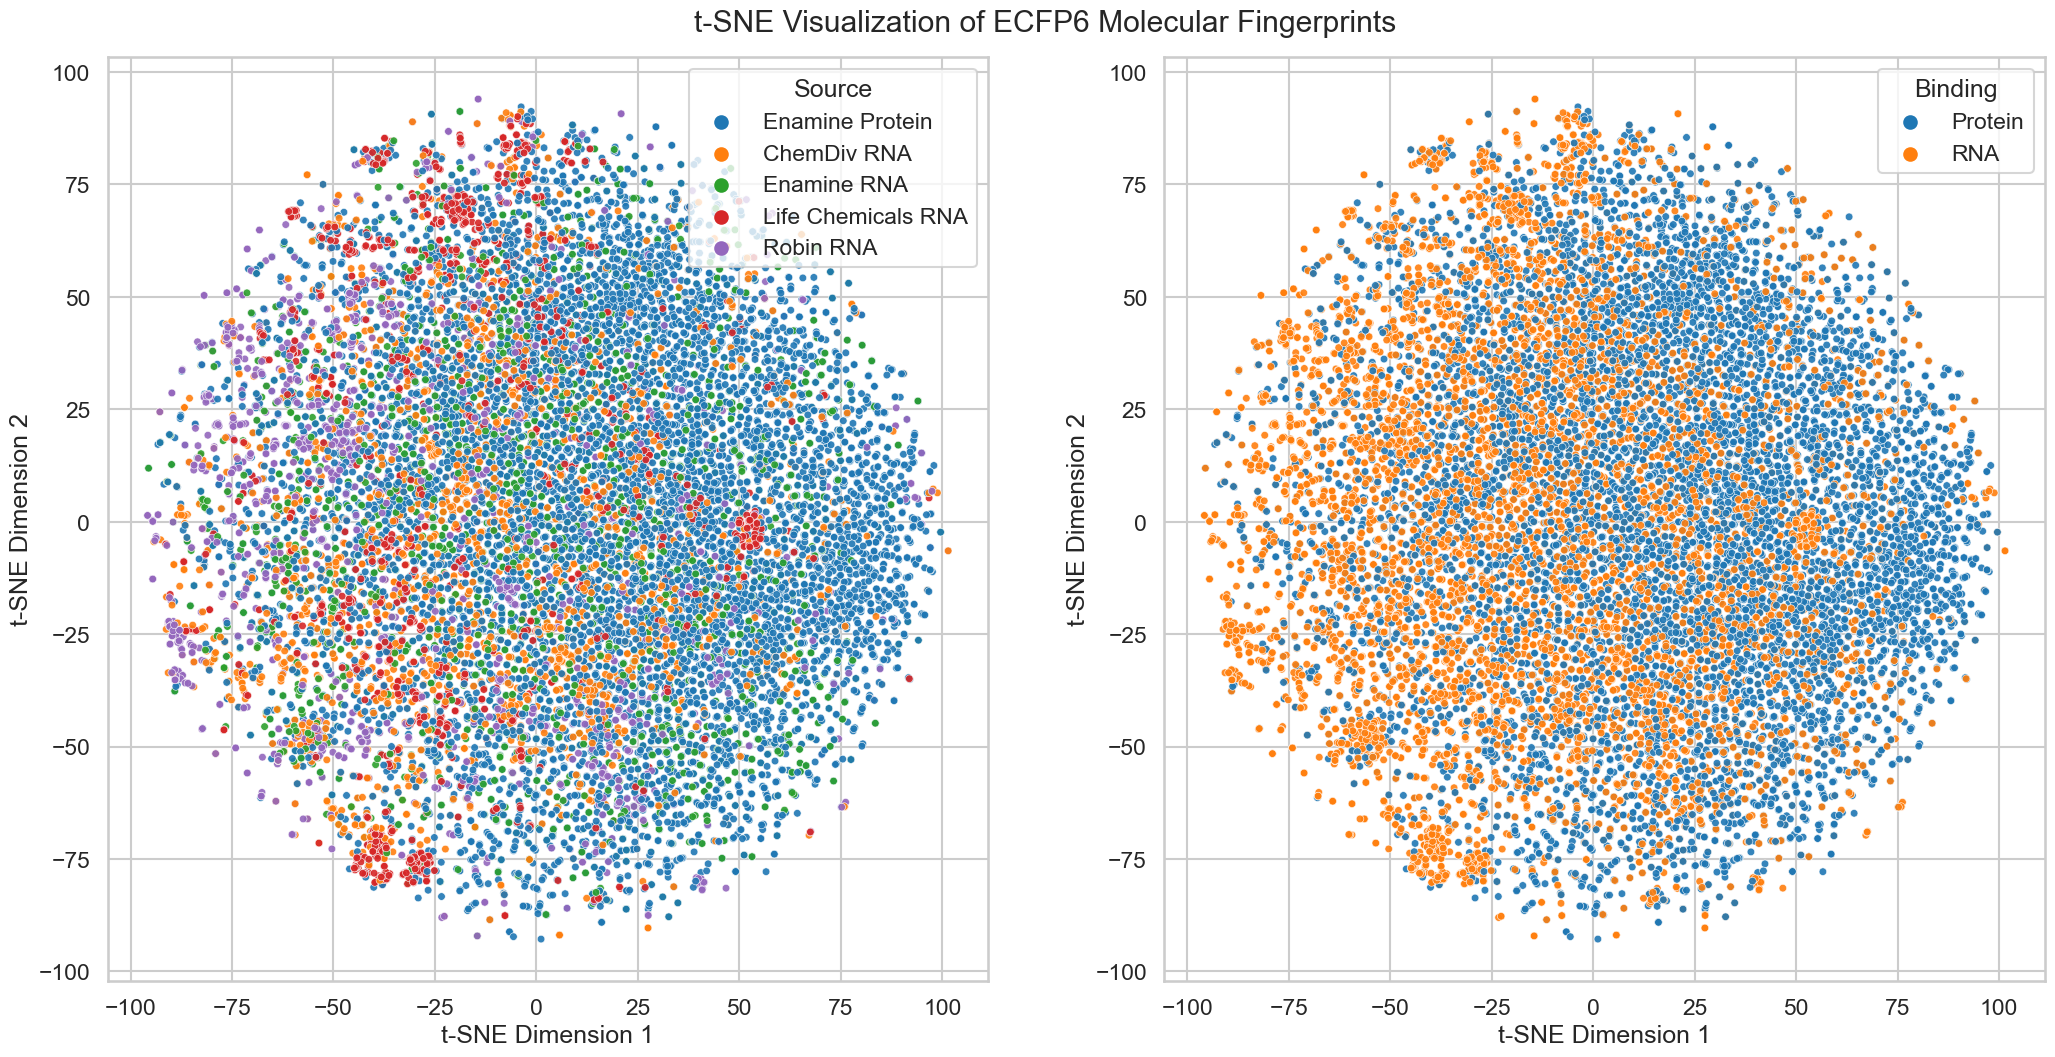

In [21]:
custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
custom_palette2 = sns.color_palette(["#1f77b4", "#ff7f0e"])

# clear the plot
plt.clf()

pca_data_transformed6 = pd.DataFrame(distance_matrix_ECFP6['source'], columns=['source'])

# we will use t-SNE for dimensionality reduction on distance matrix
n_components = 2
tsne = TSNE(n_components=n_components, n_jobs=16, metric="precomputed", init="random", random_state=42)

# Fit the t-SNE model to the data
pca_data_transformed6 = tsne.fit_transform(dist_matrix6)

pca_data_transformed6 = pd.DataFrame(pca_data_transformed6, columns=['t-SNE1', 't-SNE2'])

pca_data_transformed6['Source'] = distance_matrix_ECFP6['source'].astype(str)
# rename the values in the column source enamine_protein to Enamine Protein and enamine_rna to Enamine RNA and so on
pca_data_transformed6['Source'] = pca_data_transformed6['Source'].replace({'enamine_protein': 'Enamine Protein', 
                                                                           'enamine': 'Enamine RNA', 
                                                                           'life_chemicals': 'Life Chemicals RNA', 
                                                                           'chemdiv': 'ChemDiv RNA', 
                                                                           'robin': 'Robin RNA'})

pca_data_transformed6['Binding'] = distance_matrix_ECFP6['binding'].astype(str)

# shuffle the data
pca_data_transformed6 = pca_data_transformed6.sample(frac=1).reset_index(drop=True)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(25, 12))

# Set style
sns.set(style="whitegrid", context='talk')

source_order = ['Enamine Protein', 'ChemDiv RNA', 'Enamine RNA', 'Life Chemicals RNA', 'Robin RNA']
binding_order = ['Protein', 'RNA']

# Plot first subplot with custom_palette
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Source', data=pca_data_transformed6, s=30, ax=ax[0], palette=custom_palette, alpha=0.9, hue_order=source_order)
ax[0].set_xlabel('t-SNE Dimension 1')  # Change x-axis label
ax[0].set_ylabel('t-SNE Dimension 2')  # Change y-axis label

# Plot second subplot with custom_palette
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Binding', data=pca_data_transformed6, s=30, ax=ax[1], palette=custom_palette2, alpha=0.9, hue_order=binding_order)
ax[1].set_xlabel('t-SNE Dimension 1')  # Change x-axis label
ax[1].set_ylabel('t-SNE Dimension 2')  # Change y-axis label

# Set a common title for both plots
title = 't-SNE Visualization of ECFP6 Molecular Fingerprints'
fig.suptitle(title, y=0.92, ha='center')  # Adjust 'y' to move it down

# Save the plot as a PNG file
plt.savefig("../output/v2/tsne_plot_binding_source_distinc_col.png", format="png", dpi=300)


In [22]:
# Check the number of points per class in 'source' column
source_class_counts = pca_data_transformed6['Source'].value_counts()
print("Number of points per class in 'source' column:")
print(source_class_counts)

# Check the number of points per class in 'binding' column
binding_class_counts = pca_data_transformed6['Binding'].value_counts()
print("\nNumber of points per class in 'binding' column:")
print(binding_class_counts)

Number of points per class in 'source' column:
Source
Enamine Protein       8000
Life Chemicals RNA    2000
ChemDiv RNA           2000
Enamine RNA           2000
Robin RNA             1992
Name: count, dtype: int64

Number of points per class in 'binding' column:
Binding
Protein    8000
RNA        7992
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

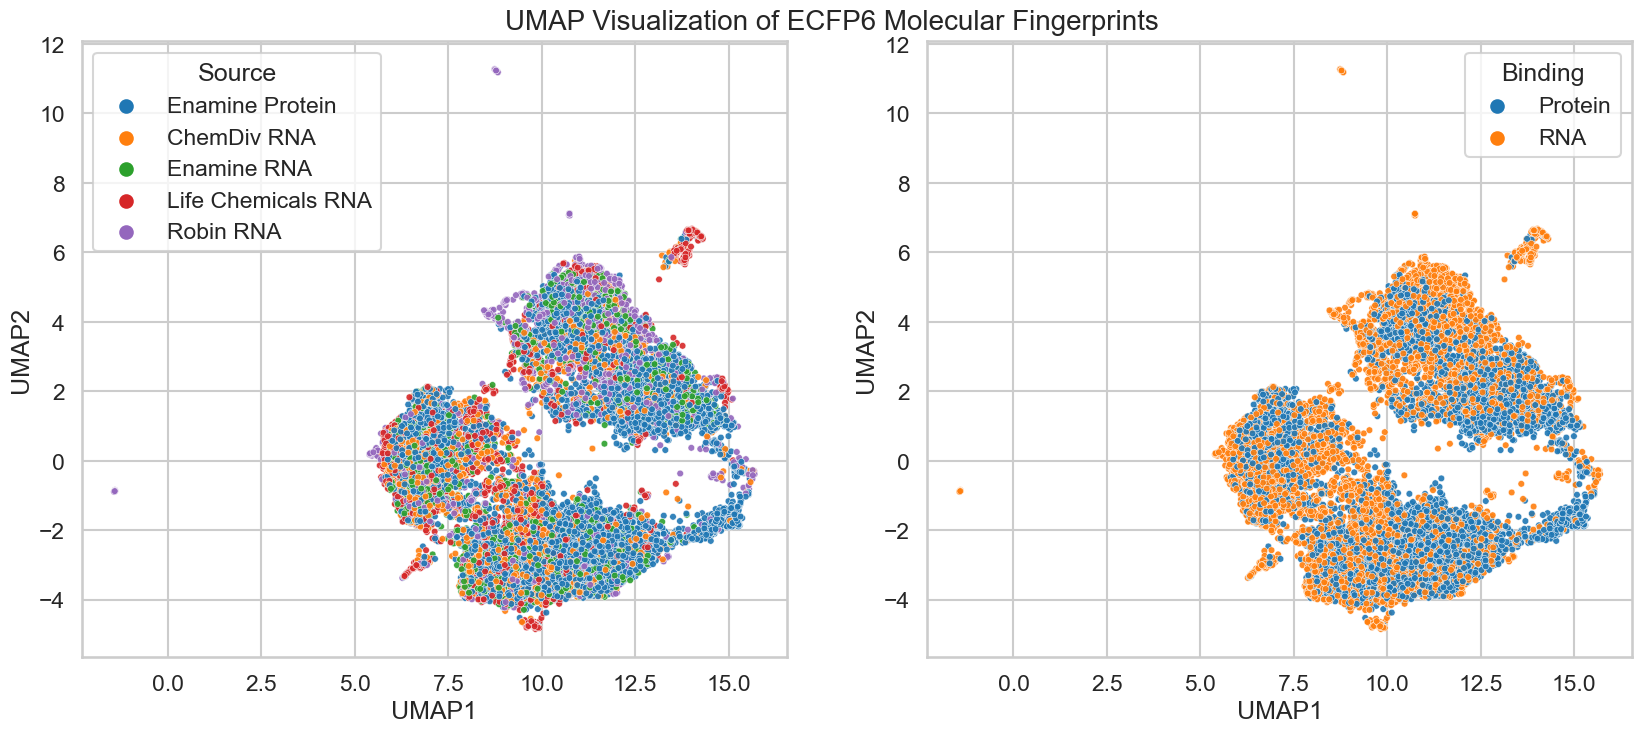

In [23]:

# clear the plot
plt.clf()

# distance matrix is in column 'ECFP4' of distance_matrix_ECFP6
# but these lists should be np arrays

dist_matrix6 = np.array(distance_matrix_ECFP6['ECFP6'].tolist())

pca_data_transformed6 = pd.DataFrame(distance_matrix_ECFP6['source'], columns=['source'])

# we will use UMAP for dimensionality reduction on distance matrix
n_components = 2
umap_model = umap.UMAP(n_components=n_components, n_jobs=15 , random_state=42) #420, 69, 66, 666

# Fit the t-SNE model to the data

pca_data_transformed6 = umap_model.fit_transform(dist_matrix6)

pca_data_transformed6 = pd.DataFrame(pca_data_transformed6, columns=['UMAP1', 'UMAP2'])

pca_data_transformed6['source'] = distance_matrix_ECFP6['source'].astype(str)
#  rename source column to Source
pca_data_transformed6.rename(columns={'source': 'Source'}, inplace=True)

pca_data_transformed6['binding'] = distance_matrix_ECFP6['binding'].astype(str)
# rename binding column to Binding
pca_data_transformed6.rename(columns={'binding': 'Binding'}, inplace=True)

# shuffle the data
pca_data_transformed6 = pca_data_transformed6.sample(frac=1).reset_index(drop=True)

# change the name of values in 'source' column enamine_protein to Enamine Protein and enamine_rna to Enamine RNA and so on
pca_data_transformed6['Source'] = pca_data_transformed6['Source'].map({'enamine': 'Enamine RNA', 
                                                                       'enamine_protein': 'Enamine Protein', 
                                                                       'life_chemicals': 'Life Chemicals RNA', 
                                                                       'chemdiv': 'ChemDiv RNA', 
                                                                       'robin': 'Robin RNA'})

# Define the desired order of categories for 'source' and 'binding'
source_order = ['Enamine Protein', 'ChemDiv RNA', 'Enamine RNA', 'Life Chemicals RNA', 'Robin RNA']
binding_order = ['Protein', 'RNA']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Set style
sns.set(style="whitegrid", context='talk')

# Define color palettes
custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])
custom_palette2 = sns.color_palette(["#1f77b4", "#ff7f0e"])


# Plot third subplot in the top-right corner
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Source', data=pca_data_transformed6, alpha=0.9, s=23, ax=axs[0], palette=custom_palette, hue_order=source_order)

# Plot fourth subplot in the top-right corner
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Binding', data=pca_data_transformed6, alpha=0.9, s=23, ax=axs[1], palette=custom_palette2, hue_order=binding_order)

fig.suptitle('UMAP Visualization of ECFP6 Molecular Fingerprints', y=0.92, ha='center', fontsize=20)  # Adjust 'y' to move it down

# Save the plot as a PNG file
plt.savefig("../output/v2/umap_plot.png", format="png", dpi=300)

# Display the plot
plt.show()

